# 1. Import Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Import Dataset

In [634]:
df = pd.read_csv('myExpenses.csv')
df

,Date,Transection Description,Amount,Category
0,1/2/23,TPTEA EXPRESS,$4.90,Food
1,1/2/23,JASONS MARKET PLACE,$8.35,Groceries
2,1/2/23,BUS/MRT,$7.92,Transport
3,3/2/23,FAIRPRICE XTRA,$25.69,Groceries
4,5/2/23,TRT,$35.40,Shopping
...,...,...,...,...
200,23/7/23,Subway,$7.30,Food
201,23/7/23,7-ELEVEN,$2.30,Food
202,27/7/23,BUS/MRT,$12.88,Transport
203,29/7/23,SCOOP WHOLEFOODS,$3.50,Groceries


# 3. Pre processing


In [635]:
# Rename column name:
df= df.rename(columns={'Transection Description':'Transection'})
df

,Date,Transection,Amount,Category
0,1/2/23,TPTEA EXPRESS,$4.90,Food
1,1/2/23,JASONS MARKET PLACE,$8.35,Groceries
2,1/2/23,BUS/MRT,$7.92,Transport
3,3/2/23,FAIRPRICE XTRA,$25.69,Groceries
4,5/2/23,TRT,$35.40,Shopping
...,...,...,...,...
200,23/7/23,Subway,$7.30,Food
201,23/7/23,7-ELEVEN,$2.30,Food
202,27/7/23,BUS/MRT,$12.88,Transport
203,29/7/23,SCOOP WHOLEFOODS,$3.50,Groceries


In [636]:
# Standarise transection observations to lower case:
df['Transection']= df['Transection'].str.lower()
df

,Date,Transection,Amount,Category
0,1/2/23,tptea express,$4.90,Food
1,1/2/23,jasons market place,$8.35,Groceries
2,1/2/23,bus/mrt,$7.92,Transport
3,3/2/23,fairprice xtra,$25.69,Groceries
4,5/2/23,trt,$35.40,Shopping
...,...,...,...,...
200,23/7/23,subway,$7.30,Food
201,23/7/23,7-eleven,$2.30,Food
202,27/7/23,bus/mrt,$12.88,Transport
203,29/7/23,scoop wholefoods,$3.50,Groceries


In [637]:
# Checking the data types of each variable:
df.dtypes

Date           object
Transection    object
 Amount        object
Category       object
dtype: object

Note that all variables are String type. 
1. Remove whitespace in column header 'Amount'
2. Convert'Date' to datetime64
3. Convert 'Amount' to float64

In [638]:
# Remove whitespace in column header:
df.columns = df.columns.str.strip()
df.dtypes

Date           object
Transection    object
Amount         object
Category       object
dtype: object

In [639]:
# Converting 'Date' data type from object to datetime:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y') 

# Add new column to show month:
df['Month'] = pd.DatetimeIndex(df['Date']).month

df.dtypes

Date           datetime64[ns]
Transection            object
Amount                 object
Category               object
Month                   int64
dtype: object

In [640]:
# Converting 'Amount' data type from object to float:
# Step 1 - Remove $
df['Amount'] = df['Amount'].str.replace('$', '',regex=True)
df.head()

,Date,Transection,Amount,Category,Month
0,2023-02-01,tptea express,4.90,Food,2
1,2023-02-01,jasons market place,8.35,Groceries,2
2,2023-02-01,bus/mrt,7.92,Transport,2
3,2023-02-03,fairprice xtra,25.69,Groceries,2
4,2023-02-05,trt,35.40,Shopping,2


In [641]:
# Converting 'Amount' data type from object to float:
# Step 2 - Convert data type to float
df.Amount= df['Amount'].astype('float64')
df.dtypes

Date           datetime64[ns]
Transection            object
Amount                float64
Category               object
Month                   int64
dtype: object

# 4. Analysis

I would like to find out the following regarding my expenses over 6 months: 
1. Which catergory of expenses do i spend most on? Did this catergory change over 6 months?
2. Within the category that i spent most on, what trends am i seeing? 
3. How can i better manage my personal expense after this project? 

## 4.1 Summary of myExpenses:

In [642]:
summary = df.groupby(['Category','Month'])['Amount'].agg([np.sum,np.mean,np.min,np.max,np.std])

In [643]:
# saving summary as a df:
df.summary= summary
print(df.summary)

                        sum       mean   amin    amax        std
Category      Month                                             
Entertainment 2       13.11  13.110000  13.11   13.11        NaN
              3       13.11  13.110000  13.11   13.11        NaN
              4       13.11  13.110000  13.11   13.11        NaN
              5       13.11  13.110000  13.11   13.11        NaN
              6      157.11  52.370000  13.11  127.00  64.660735
              7      112.11  56.055000  13.11   99.00  60.733401
Food          2      655.65  59.604545   4.90  239.30  78.563126
              3      240.04  30.005000   6.21   95.40  29.547358
              4      228.22  20.747273   2.30   70.33  20.961709
              5      532.61  26.630500   2.30  154.40  36.370543
              6      291.18  41.597143   2.30  185.80  64.655613
              7       63.98   7.997500   0.35   21.05   6.982563
Groceries     2       81.88   9.097778   0.65   25.69   7.426727
              3       37.

/var/folders/cc/1xgqz9vd23d8g992r7dp9pw00000gn/T/ipykernel_51493/826801481.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.summary= summary


In [644]:
# Replace NaN with '0':
df.summary['std']=df.summary['std'].fillna(0)
# Round values to 2dp:
df.summary.round(2)

sum   mean   amin    amax    std
Category      Month                                     
Entertainment 2       13.11  13.11  13.11   13.11   0.00
              3       13.11  13.11  13.11   13.11   0.00
              4       13.11  13.11  13.11   13.11   0.00
              5       13.11  13.11  13.11   13.11   0.00
              6      157.11  52.37  13.11  127.00  64.66
              7      112.11  56.06  13.11   99.00  60.73
Food          2      655.65  59.60   4.90  239.30  78.56
              3      240.04  30.01   6.21   95.40  29.55
              4      228.22  20.75   2.30   70.33  20.96
              5      532.61  26.63   2.30  154.40  36.37
              6      291.18  41.60   2.30  185.80  64.66
              7       63.98   8.00   0.35   21.05   6.98
Groceries     2       81.88   9.10   0.65   25.69   7.43
              3       37.91   7.58   0.80   15.55   6.75
              4       69.88   5.82   0.07   29.00   8.25
              5      160.87  16.09   0.40   47.47  14.70
              6      107.98  35.99   7.08   90.00  46.81
              7       52.18   6.52   0.35   27.14   9.08
Phone Bill    2       30.28  30.28  30.28   30.28   0.00
              3       30.28  30.28  30.28   30.28   0.00
              4       30.28  30.28  30.28   30.28   0.00
              5       30.28  30.28  30.28   30.28   0.00
              6       30.28  30.28  30.28   30.28   0.00
              7       30.28  30.28  30.28   30.28   0.00
Shopping      2      132.15  26.43   0.90   49.90  18.30
              3      227.04  45.41   1.60  164.88  67.82
              4      581.44  58.14   2.16  134.40  46.80
              5       68.89  11.48   2.16   30.00  10.35
              6      346.90  69.38   2.50  143.50  56.65
              7      304.56  43.51   2.16  102.00  40.93
Transport     2      123.71  15.46   6.59   25.00   6.65
              3       81.73  11.68   3.01   23.92   6.88
              4       73.29  12.21   6.80   16.04   4.11
              5       73.94  12.32   4.74   18.68   5.67
              6      136.61  19.52   5.34   41.16  11.65
              7       80.75  13.46   5.74   17.50   4.25

## 4.2 Pivot Table:

In [645]:
df_piv = df.pivot_table(index='Category', columns='Month', values=['Amount'], aggfunc='sum')
print(df_piv)

               Amount                                        
Month               2       3       4       5       6       7
Category                                                     
Entertainment   13.11   13.11   13.11   13.11  157.11  112.11
Food           655.65  240.04  228.22  532.61  291.18   63.98
Groceries       81.88   37.91   69.88  160.87  107.98   52.18
Phone Bill      30.28   30.28   30.28   30.28   30.28   30.28
Shopping       132.15  227.04  581.44   68.89  346.90  304.56
Transport      123.71   81.73   73.29   73.94  136.61   80.75


In [646]:
df_pivTotal= df.pivot_table(index='Month', values=['Amount'], aggfunc='sum')
print(df_pivTotal)

        Amount
Month         
2      1036.78
3       630.11
4       996.22
5       879.70
6      1070.06
7       643.86


## 4.3 Data Visualization:
**Pie Chart: Expenses over 6 months**

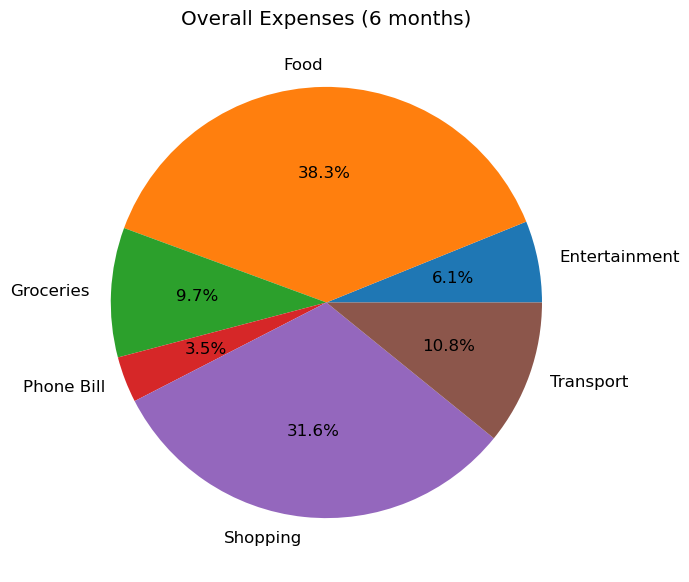

In [647]:
plt.figure(figsize=(7,7))
sums = df.groupby("Category")["Amount"].sum()
plt.pie(sums, labels=sums.index,autopct='%1.1f%%') # sums.index returns the index information of sums. 
plt.title('Overall Expenses (6 months)')

plt.show()

**Pie Chart: Expenses per month:**

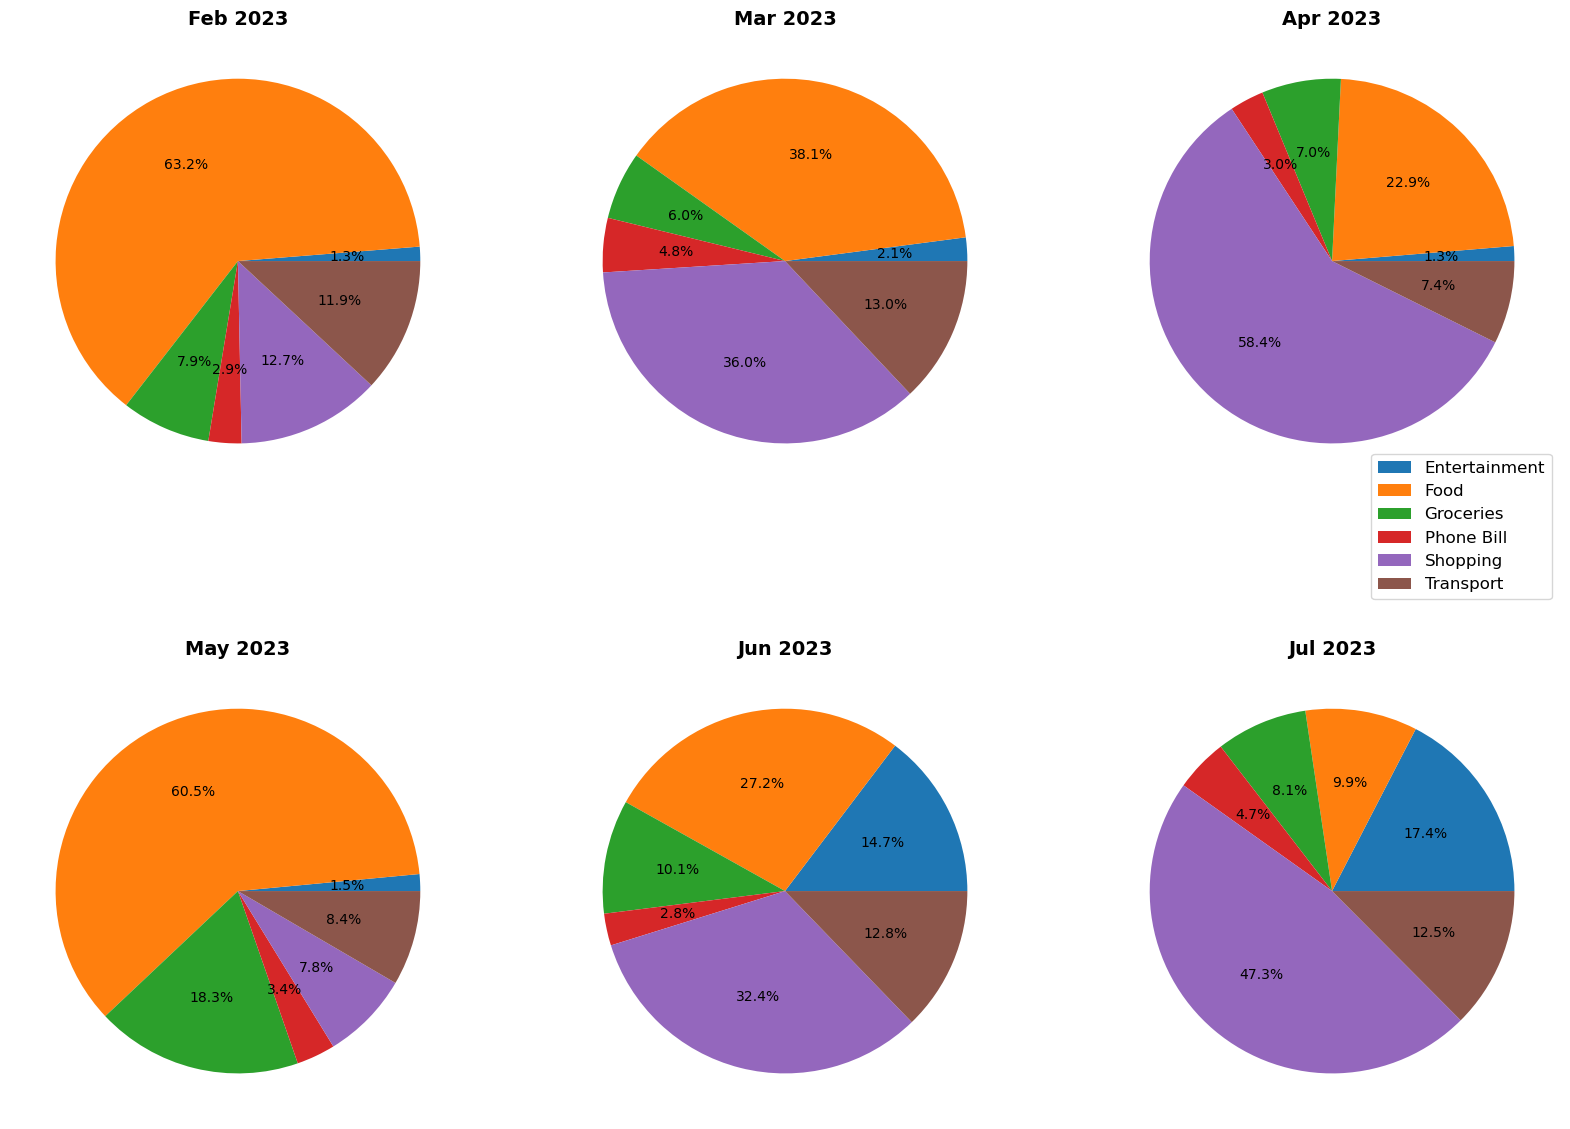

In [648]:
feb=df.where(df.Month == 2).groupby('Category')['Amount'].sum()

mar=df.where(df.Month == 3).groupby('Category')['Amount'].sum()

apr=df.where(df.Month == 4).groupby('Category')['Amount'].sum()

may=df.where(df.Month == 5).groupby('Category')['Amount'].sum()

jun=df.where(df.Month == 6).groupby('Category')['Amount'].sum()

jul=df.where(df.Month == 7).groupby('Category')['Amount'].sum()

fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(231)
feb.plot(kind ='pie',ylabel="",autopct='%1.1f%%',labeldistance=None, fontsize=10)
plt.title ('Feb 2023',fontweight='bold',fontsize=14)

ax2 = fig.add_subplot(232)
mar.plot(kind ='pie',ylabel="",autopct='%1.1f%%',labeldistance=None, fontsize=10)
plt.title ('Mar 2023',fontweight='bold',fontsize=14)

ax3 = fig.add_subplot(233)
apr.plot(kind ='pie',ylabel="",autopct='%1.1f%%',labeldistance=None, fontsize=10)
plt.title ('Apr 2023',fontweight='bold',fontsize=14)

ax4 = fig.add_subplot(234)
may.plot(kind ='pie',ylabel="",autopct='%1.1f%%',labeldistance=None, fontsize=10)
plt.title ('May 2023',fontweight='bold',fontsize=14)

ax5 = fig.add_subplot(235)
jun.plot(kind ='pie',ylabel="",autopct='%1.1f%%',labeldistance=None, fontsize=10)
plt.title ('Jun 2023',fontweight='bold',fontsize=14)

ax6 = fig.add_subplot(236)
jul.plot(kind ='pie',ylabel="",autopct='%1.1f%%',labeldistance=None, fontsize=10)
plt.title ('Jul 2023',fontweight='bold',fontsize=14)

plt.legend(loc='right', bbox_to_anchor=(1.0,1.3))


plt.show()

# 5. Insights:

The purpose of this study is to find out the following: 


**1. Which category of expenses do i spend most on?  Did this catergory change over 6 months?**
- The top two categories that most of my spendings were on are: Food & Shopping. There were months where my spending on Food surpasses Shopping such as February and May. Otherwise, most months i spend more on Shopping than Food.  

**2. Within the category that i spent most on, what trends am i seeing?**
- Within Shopping category, months such as April and July i spend more than 40% of that month's expense on shopping. This is largely attributed to having a few more friend's birthday on those months where spend more on gifts.  

- The two highest spending months are February (SGD 1036.78) and June (SGD 1070.06) which coincides with Lunar New Year 2023 and Great Singapore Sale (GSS) which explains a higher expense observed. 

- June and July there is a huge increase in Entertainment spending due to purchasing of concert tickets (Taylor Swift and Coldplay). 


**3. How can i better manage my personal expense after this project?**

- Most of my spending except Food, Shopping and Entertainment are relatively consistent. 
- I need to take note of the extra spending on friend's and family's birthday gift in April and July. 